<a href="https://colab.research.google.com/github/dantrainor9/Disease_Prediction/blob/main/DiseasePrediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
path = '/content/drive/MyDrive/Personal Projects/Disease Prediction/Training.csv'
dftrain = pd.read_csv(path)
dftrain.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
dftrain.drop(columns=['Unnamed: 133'], inplace=True)

In [6]:
dftrain.info

<bound method DataFrame.info of       itching  ...                                prognosis
0           1  ...                         Fungal infection
1           0  ...                         Fungal infection
2           1  ...                         Fungal infection
3           1  ...                         Fungal infection
4           1  ...                         Fungal infection
...       ...  ...                                      ...
4915        0  ...  (vertigo) Paroymsal  Positional Vertigo
4916        0  ...                                     Acne
4917        0  ...                  Urinary tract infection
4918        0  ...                                Psoriasis
4919        0  ...                                 Impetigo

[4920 rows x 133 columns]>

In [7]:
dftrain.shape

(4920, 133)

In [8]:
dftrain['prognosis'].value_counts(normalize=True)

Hypothyroidism                             0.02439
Chronic cholestasis                        0.02439
Arthritis                                  0.02439
Hepatitis E                                0.02439
Cervical spondylosis                       0.02439
Psoriasis                                  0.02439
GERD                                       0.02439
Acne                                       0.02439
Hepatitis C                                0.02439
Common Cold                                0.02439
Peptic ulcer diseae                        0.02439
Pneumonia                                  0.02439
Typhoid                                    0.02439
Hepatitis D                                0.02439
Osteoarthristis                            0.02439
AIDS                                       0.02439
Urinary tract infection                    0.02439
Chicken pox                                0.02439
Dimorphic hemmorhoids(piles)               0.02439
Hypertension                   

In [9]:
prog_dict = {'Allergy':0, 'Chronic cholestasis':1, 'Malaria':2, 'Typhoid':3, 'Heart attack':4, 'Dimorphic hemmorhoids(piles)':5,
             'Fungal infection':6, 'Psoriasis':7, 'Hypothyroidism':7, 'Hepatitis D':8, 'Paralysis (brain hemorrhage)':9, 'Osteoarthristis':10,
             'Cervical spondylosis':11, 'Bronchial Asthma':12, 'Hypertension ':13, 'Tuberculosis':14, 'Hyperthyroidism':15,
             'GERD':16, 'Drug Reaction':17, 'AIDS':18, 'Hypoglycemia':19, 'Hepatitis B':20, 'Dengue':21,
             'Jaundice':22, '(vertigo) Paroymsal  Positional Vertigo':23, 'Acne':24, 'Arthritis':25, 'Gastroenteritis':26, 'Impetigo':27,
             'Peptic ulcer diseae':28, 'Diabetes ':29, 'hepatitis A':30, 'Chicken pox':31, 'Alcoholic hepatitis':32, 'Pneumonia':33, 'Migraine':34,
             'Urinary tract infection':35, 'Varicose veins':36, 'Hepatitis E':37, 'Common Cold':38, 'Hepatitis C':39}
dftrain['prognosis'] = dftrain['prognosis'].apply(lambda x: prog_dict[x])

In [10]:
path2 = '/content/drive/MyDrive/Personal Projects/Disease Prediction/Testing.csv'
dftest = pd.read_csv(path2)
dftest['prognosis'] = dftest['prognosis'].apply(lambda x:prog_dict[x])

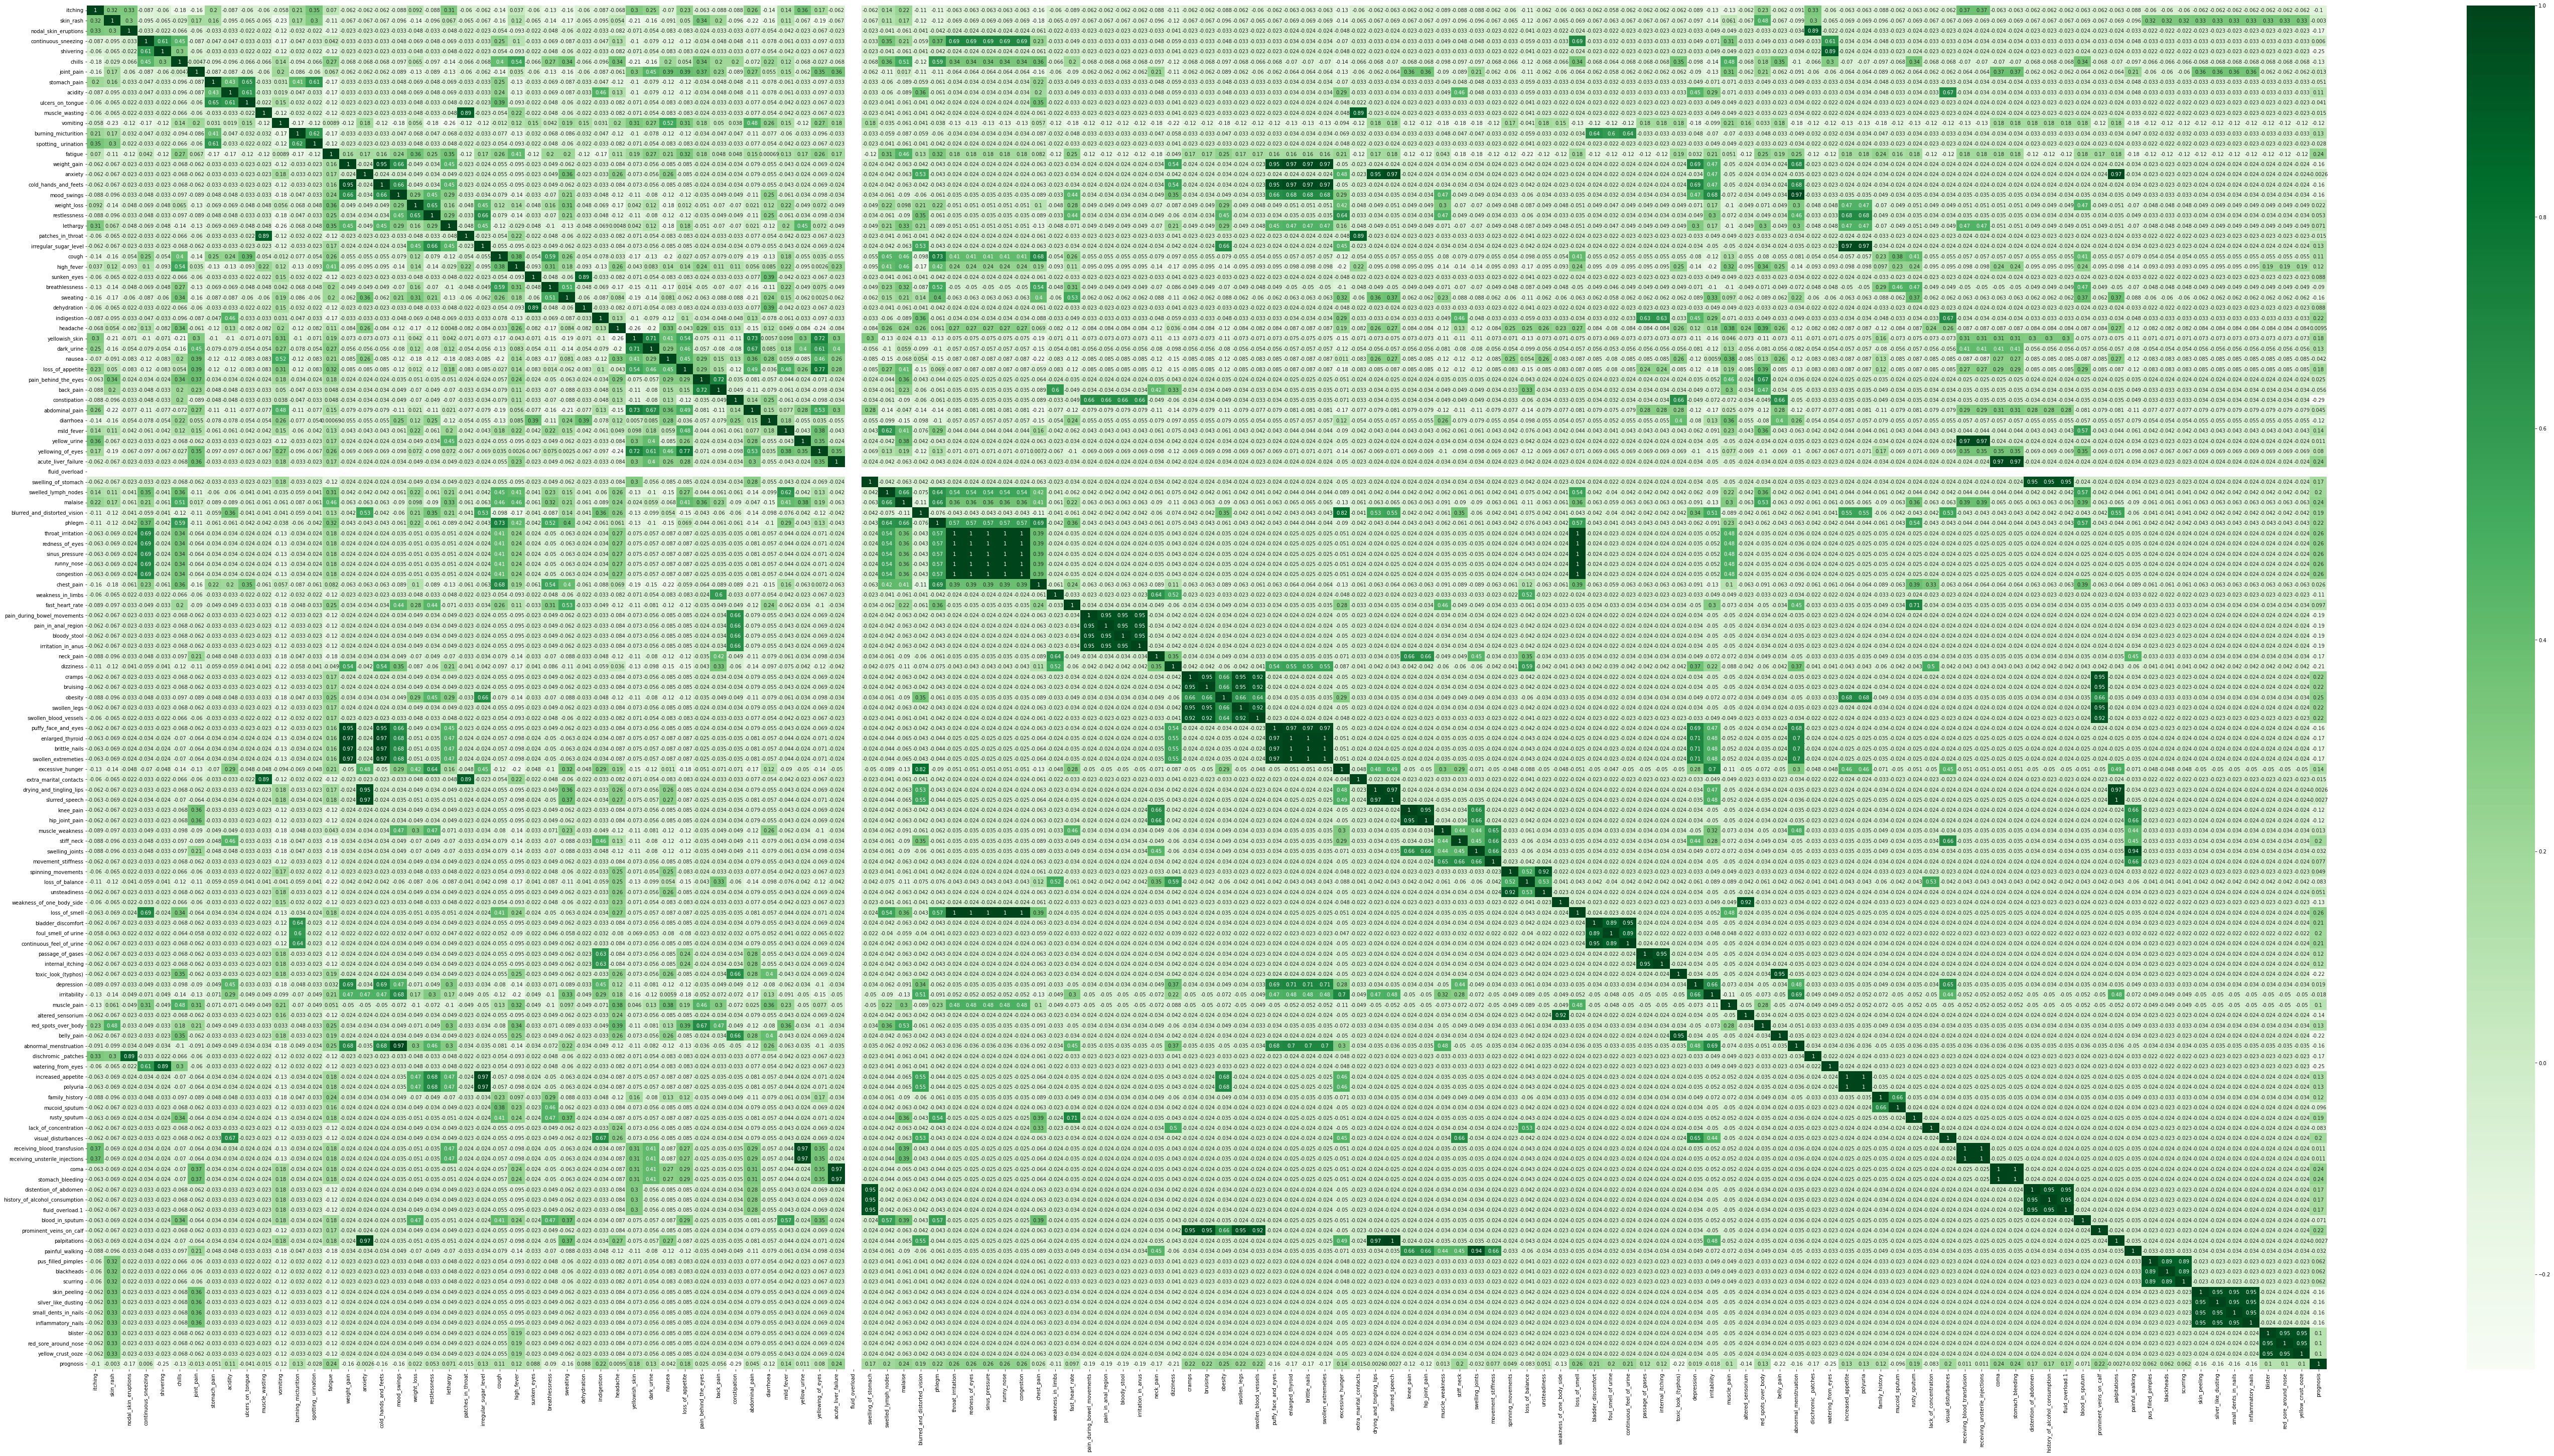

In [11]:
train_corr = dftrain.corr()
plt.figure(figsize=(100,50))
sns.heatmap(data=train_corr, cmap='Greens', annot=True);

Some of these correlations make a lot of sense, and indicate a lot of strengths about the way this data was collected. An example of this can be seen in the thyroid related symptoms of 'enlarged_thyroid', 'puffy_face_and_eyes', 'brittle_nails', and 'swollen_extremities'. These symptoms having such a strong correlation, especially considering the 'prognosis' possibilities include both hypothyroidism and hyperthyroidism, is reassuring about the quality of our dataset. However, we can see some weaknesses as well. 'swollen_extremities' can also be caused by Cushing's syndrome, for example, however this was not tracked as a prognosis. There is also a 100% correlation between slurred speech and palpitations, likely indicating slurred speech was reported by 100% of people with cardiac issues such as hypertension or heart attack, which makes sense in itself. However, we know that slurred speech can also come from developmental disorders, speech impediments, or even a few servings of alcohol. A model built on this dataset may wrongly diagnose someone with a cleft palette as having a heart attack. More data on more variables such as alcohol consumption, and a larger sample with more varying prognoses will  both improve this model's performance on real-world data. 

In [13]:
X_train = dftrain.drop(columns=['prognosis'])
y_train = dftrain['prognosis']
X_test = dftest.drop(columns=['prognosis'])
y_test = dftest['prognosis']

In [88]:
rfclass = RandomForestClassifier(min_samples_leaf=120,
                                 random_state=42)

In [89]:
rfclass.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=120, random_state=42)

In [90]:
def eval_model(pipe, X_train, y_train):
  yhattrain = pipe.predict(X_train)
  mae_train = mean_absolute_error(y_train, yhattrain)
  mse_train = mean_squared_error(y_train, yhattrain)
  rmse_train = np.sqrt(mse_train)
  r2_train = r2_score(y_train, yhattrain)
  print('MAE: ', mae_train)
  print('MSE: ', mse_train)
  print('RMSE: ', rmse_train)
  print('R2: ', r2_train)

eval_model(rfclass, X_train, y_train)
eval_model(rfclass, X_test, y_test)

MAE:  0.7146341463414634
MSE:  13.553658536585365
RMSE:  3.6815293746737057
R2:  0.8986400035590355
MAE:  0.40476190476190477
MSE:  6.880952380952381
RMSE:  2.6231569493555624
R2:  0.9488713189919167


In [78]:
treeclass = DecisionTreeClassifier(max_depth=30,
                                   min_samples_leaf=5,
                                   random_state=42)

In [79]:
treeclass.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=5, random_state=42)

In [80]:
eval_model(treeclass, X_train, y_train)
eval_model(treeclass, X_test, y_test)

MAE:  0.3975609756097561
MSE:  8.817073170731707
RMSE:  2.969355682758754
R2:  0.9340621941453866
MAE:  0.5952380952380952
MSE:  14.880952380952381
RMSE:  3.857583749052298
R2:  0.8894275929755983


In [85]:
bagclass = BaggingClassifier(n_estimators=500, random_state=42)

In [86]:
bagclass.fit(X_train, y_train)

BaggingClassifier(n_estimators=500, random_state=42)

In [87]:
eval_model(bagclass, X_train, y_train)
eval_model(bagclass, X_test, y_test)

MAE:  0.0
MSE:  0.0
RMSE:  0.0
R2:  1.0
MAE:  0.5952380952380952
MSE:  14.880952380952381
RMSE:  3.857583749052298
R2:  0.8894275929755983


With just some preliminary hyperparameter tuning it's clear that a RandomForestClassifier performs with the least error on this test data when compared to two other models (RMSE of 2.623 vs RMSE of 3.858 for both DecisionTreeClassifier and BaggingClassifier).